<a href="https://colab.research.google.com/github/ncellepola/ML/blob/master/data_processing_multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langchain-openai langchain-community langchain-experimental
!pip install langchain-openai
!pip install langchain-chroma
!pip install langchain-community
!pip install langchain-experimental

In [ ]:
! pip install "unstructured[all-docs]"

In [ ]:
# install OCR dependencies for unstructured
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

In [ ]:
!pip install htmltabletomd

## Data Loading

### Partition PDF tables, text, and images
  

In [ ]:
!rm -rf ./figures

In [5]:
from langchain_community.document_loaders import UnstructuredPDFLoader

doc = './test.pdf'

# takes 1 min on Colab
loader = UnstructuredPDFLoader(file_path=doc,
                               strategy='hi_res',
                               extract_images_in_pdf=True,
                               infer_table_structure=True,
                               chunking_strategy="by_title", # section-based chunking
                               max_characters=4000, # max size of chunks
                               new_after_n_chars=4000, # preferred size of chunks
                               combine_text_under_n_chars=2000, # smaller chunks < 2000 chars will be combined into a larger chunk
                               mode='elements',
                               image_output_dir_path='./figures')
data = loader.load()

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [6]:
len(data)

20

In [7]:
[doc.metadata['category'] for doc in data]

['CompositeElement',
 'Table',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement']

In [8]:
data[0]

Document(metadata={'source': './test.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2024-11-22T00:41:25', 'page_number': 1, 'orig_elements': 'eJzNWVtv28gV/isD9XEzzMyZu59qO9lNitgJLAd9yAbG3GixlUWVopJ4t/3ve0hKXt+K2gKoGrAhfUdnpOH55lzny++TPM9XedFeVGlyQCYpljEobykvpaBSyES9Y5yyGL1Lwjou/eQVmVzl1iffelzz+yTWdZOqhW/zqsdzf12v24tZri5nLUoAGMM1G/H3KrUzlHLTS5d1tWi7dV++gOKFeUWA2YJ9fUW2GH+1EB2WyhTiIR70UTBZXa/afNU9x6fqR55Plz7myX/wg7Ka5/Z6mfuPPp10T1Bd+ct8sfT9XiavY71o0Qyvy+py3eTV5pVyyot/LC8n/fYXl2tc0+91kheXk6+9dNVeXNWpKqvcWxAYSMo5BThn7EDyA1Dd6mX3a4v1VchN9+zdptr8o7PO5OdMjqbk1zVwgE51u9H33Q677d8nqdRKG4b8GG0tlcZkGlIoabJRcwslBF6ORpI2puBodMUK2ZGwxUhKjzmz0LP4QNCveC5No1n9ePr57RE59s28XpGjnMmHKjS+ub7NwHnVzh9lwPqodQRHwWdFZWCOhmgFVUFwoS0wxexoDBirCxSBU4ObbLCQMGBn5GN40H8x9p9+Pjp5f35++OFJBo+SRaO1pxidDJXRKxqUC7TMgWfPwbgUx4tL0nQGlGJz5LdY84L3cQh4YR/B4n8e+JTbHNuqXlxENOnqYtnUAdVYAc5pvm+P+Hh6fvbxAzl8f/Y0J9A5xxQ9TVIAlU456nlm+M5ZzbIV+D8iJ6LnAF82nPRYO4w1PQcCCv0QD/q7cSKYdnbfnBy+JX+rA/nLATnGDNX42NbNAZmu

In [17]:
data[3]

Document(metadata={'source': './test.pdf', 'last_modified': '2024-11-22T00:41:25', 'text_as_html': '<table><tr><td>[Description</td><td>[——FSDEO</td><td>FSD60LP</td></tr><tr><td/><td>5" x 16 gauge (127 x 1.6) galvanized, single piece, hat-shaped channel, struc- turally superior to 13 (2.4) gauge channel frame.</td><td>Integral sleeve and frame 20 (1.0) gauge galvanized single piece.</td></tr><tr><td>Blades</td><td>One-piece airfoil, nominal 6" (152) wide and 14 (2.0) gauge galvanized steel equivalent strength. Blades are approximately 6" (152) on center.</td><td>Low profile aerodynamic shaped, double skin of 16 (1.6) and 20 (1.0) gauge galvanized steel.</td></tr><tr><td>Bearings</td><td>Stainless steel sleeve type, pressed into frame.</td><td>Stainless steel sleeve type, pressed into frame.</td></tr><tr><td>Jamb Seal</td><td>Stainless steel, flexible metal compression type.</td><td>Stainless steel, flexible metal compression type.</td></tr><tr><td>Blade Seal</td><td>Silicone edge type 

In [10]:
from IPython.display import HTML, display, Markdown


In [18]:
print(data[3].page_content)

Description StANDARD CoNStRUCtIoN FSD60 5" x 16 gauge (127 x 1.6) FSD60LP Integral sleeve and frame Frame galvanized, single piece, hat-shaped channel, struc- turally superior to 13 (2.4) gauge channel frame. 20 (1.0) gauge galvanized single piece. One-piece airfoil, nominal 6" (152) wide and 14 (2.0) gauge galvanized steel Low profile aerodynamic shaped, double skin of 16 (1.6) and 20 (1.0) Blades Bearings equivalent strength. Blades are approximately 6" (152) on center. Stainless steel sleeve type, pressed into frame. gauge galvanized steel. Stainless steel sleeve type, pressed into frame. Stainless steel, flexible metal Stainless steel, flexible Jamb Seal Blade Seal compression type. Silicone edge type for smoke seal to 450°F (232°C) and galvanized steel for flame seal to 1900°F (1038°C) mechanically fastened to the blade edge. Concealed in frame. metal compression type. Stainless steel, flexible metal compression type. Not Required


In [19]:
data[3].metadata['text_as_html']

'<table><tr><td>[Description</td><td>[——FSDEO</td><td>FSD60LP</td></tr><tr><td/><td>5" x 16 gauge (127 x 1.6) galvanized, single piece, hat-shaped channel, struc- turally superior to 13 (2.4) gauge channel frame.</td><td>Integral sleeve and frame 20 (1.0) gauge galvanized single piece.</td></tr><tr><td>Blades</td><td>One-piece airfoil, nominal 6" (152) wide and 14 (2.0) gauge galvanized steel equivalent strength. Blades are approximately 6" (152) on center.</td><td>Low profile aerodynamic shaped, double skin of 16 (1.6) and 20 (1.0) gauge galvanized steel.</td></tr><tr><td>Bearings</td><td>Stainless steel sleeve type, pressed into frame.</td><td>Stainless steel sleeve type, pressed into frame.</td></tr><tr><td>Jamb Seal</td><td>Stainless steel, flexible metal compression type.</td><td>Stainless steel, flexible metal compression type.</td></tr><tr><td>Blade Seal</td><td>Silicone edge type for smoke seal to 450°F (232°C) and galvanized steel for flame seal to 1900°F (1038°C) mechanically

In [20]:
display(Markdown(data[3].metadata['text_as_html']))

<table><tr><td>[Description</td><td>[——FSDEO</td><td>FSD60LP</td></tr><tr><td/><td>5" x 16 gauge (127 x 1.6) galvanized, single piece, hat-shaped channel, struc- turally superior to 13 (2.4) gauge channel frame.</td><td>Integral sleeve and frame 20 (1.0) gauge galvanized single piece.</td></tr><tr><td>Blades</td><td>One-piece airfoil, nominal 6" (152) wide and 14 (2.0) gauge galvanized steel equivalent strength. Blades are approximately 6" (152) on center.</td><td>Low profile aerodynamic shaped, double skin of 16 (1.6) and 20 (1.0) gauge galvanized steel.</td></tr><tr><td>Bearings</td><td>Stainless steel sleeve type, pressed into frame.</td><td>Stainless steel sleeve type, pressed into frame.</td></tr><tr><td>Jamb Seal</td><td>Stainless steel, flexible metal compression type.</td><td>Stainless steel, flexible metal compression type.</td></tr><tr><td>Blade Seal</td><td>Silicone edge type for smoke seal to 450°F (232°C) and galvanized steel for flame seal to 1900°F (1038°C) mechanically fastened to the blade edge.</td><td>Stainless steel, flexible metal compression type.</td></tr><tr><td>Linkage</td><td>Concealed in frame.</td><td>Not Required</td></tr></table>

Since unstructured extracts the text from the table without any borders, we can use the HTML text and put it directly in prompts (LLMs understand HTML tables well) or even better convert HTML tables to Markdown tables as below

In [21]:
import htmltabletomd

md_table = htmltabletomd.convert_table(data[3].metadata['text_as_html'])
print(md_table)

| | | |
| :--- | :--- | :--- |
| [Description | [——FSDEO | FSD60LP |
|  | 5" x 16 gauge (127 x 1.6) galvanized, single piece, hat-shaped channel, struc- turally superior to 13 (2.4) gauge channel frame. | Integral sleeve and frame 20 (1.0) gauge galvanized single piece. |
| Blades | One-piece airfoil, nominal 6" (152) wide and 14 (2.0) gauge galvanized steel equivalent strength. Blades are approximately 6" (152) on center. | Low profile aerodynamic shaped, double skin of 16 (1.6) and 20 (1.0) gauge galvanized steel. |
| Bearings | Stainless steel sleeve type, pressed into frame. | Stainless steel sleeve type, pressed into frame. |
| Jamb Seal | Stainless steel, flexible metal compression type. | Stainless steel, flexible metal compression type. |
| Blade Seal | Silicone edge type for smoke seal to 450°F (232°C) and galvanized steel for flame seal to 1900°F (1038°C) mechanically fastened to the blade edge. | Stainless steel, flexible metal compression type. |
| Linkage | Concealed in fr

In [22]:
md_table

'| | | |\n| :--- | :--- | :--- |\n| [Description | [——FSDEO | FSD60LP |\n|  | 5" x 16 gauge (127 x 1.6) galvanized, single piece, hat-shaped channel, struc- turally superior to 13 (2.4) gauge channel frame. | Integral sleeve and frame 20 (1.0) gauge galvanized single piece. |\n| Blades | One-piece airfoil, nominal 6" (152) wide and 14 (2.0) gauge galvanized steel equivalent strength. Blades are approximately 6" (152) on center. | Low profile aerodynamic shaped, double skin of 16 (1.6) and 20 (1.0) gauge galvanized steel. |\n| Bearings | Stainless steel sleeve type, pressed into frame. | Stainless steel sleeve type, pressed into frame. |\n| Jamb Seal | Stainless steel, flexible metal compression type. | Stainless steel, flexible metal compression type. |\n| Blade Seal | Silicone edge type for smoke seal to 450°F (232°C) and galvanized steel for flame seal to 1900°F (1038°C) mechanically fastened to the blade edge. | Stainless steel, flexible metal compression type. |\n| Linkage | Concea

In [23]:
docs = []
tables = []

for doc in data:
    if doc.metadata['category'] == 'Table':
        tables.append(doc)
    elif doc.metadata['category'] == 'CompositeElement':
        docs.append(doc)

len(docs), len(tables)

(13, 7)

In [24]:
for table in tables:
    table.page_content = htmltabletomd.convert_table(table.metadata['text_as_html'])

In [25]:
for table in tables:
    print(table.page_content)
    print()

| | |
| :--- | :--- |
| LOCATION: | Hayward, CA |
| ARCHITECT: |
| MECH ENGR: | Integral Group |
| MECH CONT: | Control Air Enterprises |
| PREPARED BY: | Leao |


| | | |
| :--- | :--- | :--- |
| [Description | [——FSDEO | FSD60LP |
|  | 5" x 16 gauge (127 x 1.6) galvanized, single piece, hat-shaped channel, struc- turally superior to 13 (2.4) gauge channel frame. | Integral sleeve and frame 20 (1.0) gauge galvanized single piece. |
| Blades | One-piece airfoil, nominal 6" (152) wide and 14 (2.0) gauge galvanized steel equivalent strength. Blades are approximately 6" (152) on center. | Low profile aerodynamic shaped, double skin of 16 (1.6) and 20 (1.0) gauge galvanized steel. |
| Bearings | Stainless steel sleeve type, pressed into frame. | Stainless steel sleeve type, pressed into frame. |
| Jamb Seal | Stainless steel, flexible metal compression type. | Stainless steel, flexible metal compression type. |
| Blade Seal | Silicone edge type for smoke seal to 450°F (232°C) and galvanize

In [26]:
! ls -l ./figures

total 1120
-rw-r--r-- 1 root root  11081 Nov 22 00:44 figure-11-27.jpg
-rw-r--r-- 1 root root  78553 Nov 22 00:44 figure-11-28.jpg
-rw-r--r-- 1 root root  56218 Nov 22 00:44 figure-11-29.jpg
-rw-r--r-- 1 root root  66561 Nov 22 00:44 figure-11-30.jpg
-rw-r--r-- 1 root root   8885 Nov 22 00:44 figure-11-31.jpg
-rw-r--r-- 1 root root   5405 Nov 22 00:44 figure-1-1.jpg
-rw-r--r-- 1 root root  11425 Nov 22 00:44 figure-12-32.jpg
-rw-r--r-- 1 root root  30039 Nov 22 00:44 figure-12-33.jpg
-rw-r--r-- 1 root root  37644 Nov 22 00:44 figure-12-34.jpg
-rw-r--r-- 1 root root  42243 Nov 22 00:44 figure-12-35.jpg
-rw-r--r-- 1 root root  29231 Nov 22 00:44 figure-2-2.jpg
-rw-r--r-- 1 root root  11436 Nov 22 00:44 figure-3-3.jpg
-rw-r--r-- 1 root root  16020 Nov 22 00:44 figure-3-4.jpg
-rw-r--r-- 1 root root  34886 Nov 22 00:44 figure-3-5.jpg
-rw-r--r-- 1 root root  14305 Nov 22 00:44 figure-3-6.jpg
-rw-r--r-- 1 root root  17420 Nov 22 00:44 figure-4-7.jpg
-rw-r--r-- 1 root root 191762 Nov 22 00:44 

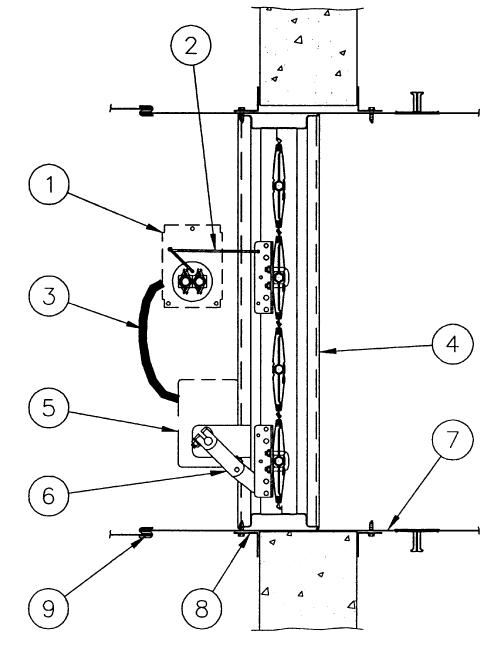

In [28]:
from IPython.display import Image

Image('./figures/figure-9-22.jpg')

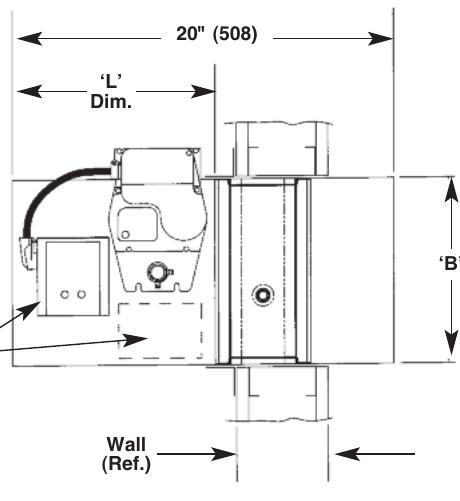

In [29]:
Image('./figures/figure-6-10.jpg')

#### Enter Open AI API Key

In [30]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


In [31]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

#### Load Connection to LLM

Here we create a connection to ChatGPT to use later in our chains

In [32]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-4o', temperature=0)

## Multi-vector retriever

Use [multi-vector-retriever](https://python.langchain.com/docs/modules/data_connection/retrievers/multi_vector#summary) to index image (and / or text, table) summaries, but retrieve raw images (along with raw texts or tables).

### Text and Table summaries

We will use GPT-4o to produce table and, text summaries.

Text summaries are advised if using large chunk sizes (e.g., as set above, we use 4k token chunks).

Summaries are used to retrieve raw tables and / or raw chunks of text.

In [43]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text particularly for semantic retrieval.
Please perform concise summaries while extracting essential entities and
relationships for relationships analysis later, please do include dates of actions or events,
which are very important for timeline analysis later.
Give a detailed summary of the table or text below that is well optimized for retrieval.
For any tables also add in a one line description of what the table is about besides the summary.
Do not add additional words like Summary: etc.

Table or text chunk:
{element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
summarize_chain = (
                    {"element": RunnablePassthrough()}
                      |
                    prompt
                      |
                    chatgpt
                      |
                    StrOutputParser() # extracts the response as text and returns it as a string
)

# Initialize empty summaries
text_summaries = []
table_summaries = []

text_docs = [doc.page_content for doc in docs]
table_docs = [table.page_content for table in tables]

text_summaries = summarize_chain.batch(text_docs, {"max_concurrency": 5})
table_summaries = summarize_chain.batch(table_docs, {"max_concurrency": 5})

len(text_summaries), len(table_summaries)

(13, 7)

In [ ]:
type(text_summaries)

In [44]:
text_summaries[0]

'The table is a submittal document related to the installation of fire and smoke dampers at the Carlos Bee Library, California State University, East Bay (CSUEB). The project is managed under CAE Job #201-20-0001 by the contractor Rudolph and Sletten, with Carrier Johnson + Culture as the architect and Integral Group as the engineer. The subcontractor is not specified. The specification section for the project is 233300, and the submittal includes product data and shop drawings. Smoke detectors are to be provided by Division 26. The submittal was issued on May 20, 2020, by Norman S. Wright Mechanical Equipment Corporation, located in Brisbane, CA.'

In [45]:
table_summaries[0]

"The table provides information about a project located in Hayward, CA. The mechanical engineering firm involved is Integral Group, and the mechanical contractor is Control Air Enterprises. The document was prepared by Leao. The architect's information is not provided."

### Image summaries

We will use [GPT-4o](https://openai.com/index/hello-gpt-4o/) to produce the image summaries.

* We pass base64 encoded images

In [46]:
import base64
import os

from langchain_core.messages import HumanMessage


def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", temperature=0)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content


def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval.
                Remember these images could potentially contain graphs, charts or tables also.
                please perform concise summaries while extracting essential entities and
                relationships for relationships analysis later, please do include dates of actions or events,
                which are very important for timeline analysis later.
                Give a detailed summary of the image that is well optimized for retrieval.
                Do not add additional words like Summary: etc.
             """

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries


# Image summaries
IMG_PATH = './figures'
imgs_base64, image_summaries = generate_img_summaries(IMG_PATH)

In [37]:
len(imgs_base64), len(image_summaries)

(35, 35)

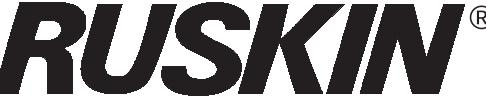

In [40]:
display(Image('./figures/figure-11-27.jpg'))

In [38]:
image_summaries[1]

'The image displays the logo of the company "RUSKIN" in bold, black capital letters. The font is sans-serif, and there is a registered trademark symbol (®) positioned at the top right corner of the logo. The background is plain white, emphasizing the text.'

In [47]:
all_list=[text_summaries,table_summaries,image_summaries]

In [48]:
with open('combined_text.txt', 'w') as file:
    for lst in all_list:
        for line in lst:
            file.write(line + '\n')